In [ ]:
# Obviously this is wrong, but we will get there

In [1]:
import pandas as pd
from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (15, 8) #WxH
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv("2019_Powerball.csv")
print(df.columns)
df

Index(['Date', 'Powerball', 'Date_Time', 'Date_Str', 'Date_Delta', 'PBstr'], dtype='object')


,Date,Powerball,Date_Time,Date_Str,Date_Delta,PBstr
0,1/1/2019,,2019-01-01,20190101,0.0,00000
1,1/1/2019,,2019-01-01,20190101,0.0,00000
2,1/10/2019,,2019-01-10,20190110,9.0,00000
3,1/10/2019,,2019-01-10,20190110,9.0,00000
4,1/11/2019,,2019-01-11,20190111,10.0,00000
...,...,...,...,...,...,...
725,9/7/2019,11 20 41 42 56 +6 x2 $40.00 M/0,2019-09-07,20190907,249.0,11 20 41 42 56 +6 x2 $40.00 M/0
726,9/8/2019,,2019-09-08,20190908,250.0,00000
727,9/8/2019,,2019-09-08,20190908,250.0,00000
728,9/9/2019,,2019-09-09,20190909,251.0,00000


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df, df, test_size=0.5, random_state=2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        730 non-null    object 
 1   Powerball   730 non-null    object 
 2   Date_Time   730 non-null    object 
 3   Date_Str    730 non-null    int64  
 4   Date_Delta  730 non-null    float64
 5   PBstr       730 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 34.3+ KB


In [6]:
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(X_train['Powerball'], y_test['Powerball']))
print(mean_absolute_error(y_train['Powerball'], X_test['Powerball']))

ValueError: could not convert string to float: ' 6 14 36 51 54 +4 x2 $70.00 M/0'

In [123]:
print("X_train: \n",X_train)
print("X_test: \n",X_test)
print("y_train: \n",y_train)
print("y_test: \n",y_test)

X_train: 
       Draw        Date  Pick3  Pick4   Date_Time  Date_Str  Date_Delta  \
3477     1  2016-10-05    344   1103  2016-10-05  20161005      1739.0   
4380     1  2017-12-31    712   2334  2017-12-31  20171231      2191.0   
3730     0  2017-02-09    692   5533  2017-02-09  20170209      1866.0   
4205     1  2017-10-04    413   9916  2017-10-04  20171004      2103.0   
1661     0  2014-04-11    924   1062  2014-04-11  20140411       831.0   
...    ...         ...    ...    ...         ...       ...         ...   
1099     0  2013-07-04    342   4436  2013-07-04  20130704       550.0   
2514     0  2015-06-12    271   2560  2015-06-12  20150612      1258.0   
3606     0  2016-12-09    386   6704  2016-12-09  20161209      1804.0   
5704     0  2019-10-24    260   2356  2019-10-24  20191024      2853.0   
2575     1  2015-07-12    354   6165  2015-07-12  20150712      1288.0   

      Pick3str  Pick4str  P3B1  P3B2  P3B3  P4B1  P4B2  P4B3  P4B4  
3477       344      1103     3 

In [124]:
df.loc[df['Date_Delta']==303]

,Draw,Date,Pick3,Pick4,Date_Time,Date_Str,Date_Delta,Pick3str,Pick4str,P3B1,P3B2,P3B3,P4B1,P4B2,P4B3,P4B4
605,0,2012-10-30,135,8342,2012-10-30,20121030,303.0,135,8342,1,3,5,8,3,4,2
606,1,2012-10-30,845,3673,2012-10-30,20121030,303.0,845,3673,8,4,5,3,6,7,3


In [147]:
features = ['Draw','Date_Str']
target = ['Draw','Pick3','Pick4','Date_Str']

# Fit model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='mse') # {“mse”, “friedman_mse”, “mae”}, default=”mse”
model.fit(X_train[features], y_test[target])
# model.fit(df[features], df[target])
print(model.predict([[1,20200407]]))

[[0.0000000e+00 6.4500000e+02 3.7300000e+03 2.0131105e+07]]


In [146]:
features = ['Draw','Date_Str'] 
target = ['P3B1','P3B2','P3B3','Date_Str']

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=int(2)) # changing this gives worse results - num nearest # default = 1
# model.fit(y_train[features], X_test[target])
model.fit(df[features], df[target])
print(model.predict([[1,20200408]]))# date to predict for YYYYMMDD


[[4.0000000e+00 7.0000000e+00 8.0000000e+00 2.0191231e+07]]


In [35]:
# number search
train.loc[train['Pick3']>=train['Pick4']]

,Draw,Date,Pick3,Pick4,Date_Time,Date_Str,Date_Delta,Pick3str,Pick4str,P3B1,P3B2,P3B3,P4B1,P4B2,P4B3,P4B4
0,0,2012-01-01,991,979,2012-01-01,20120101,0.0,991,979,9,9,1,0,9,7,9
3,1,2012-01-02,629,452,2012-01-02,20120102,1.0,629,452,6,2,9,0,4,5,2
25,1,2012-01-13,562,369,2012-01-13,20120113,12.0,562,369,5,6,2,0,3,6,9
57,1,2012-01-29,532,54,2012-01-29,20120129,28.0,532,54,5,3,2,0,0,5,4
146,0,2012-03-14,770,666,2012-03-14,20120314,73.0,770,666,7,7,0,0,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,0,2019-11-07,575,438,2019-11-07,20191107,2867.0,575,438,5,7,5,0,4,3,8
5771,1,2019-11-26,775,138,2019-11-26,20191126,2886.0,775,138,7,7,5,0,1,3,8
5773,1,2019-11-27,114,85,2019-11-27,20191127,2887.0,114,85,1,1,4,0,0,8,5
5777,1,2019-11-29,811,433,2019-11-29,20191129,2889.0,811,433,8,1,1,0,4,3,3


In [37]:
train.loc[train['Pick3']<500]

,Draw,Date,Pick3,Pick4,Date_Time,Date_Str,Date_Delta,Pick3str,Pick4str,P3B1,P3B2,P3B3,P4B1,P4B2,P4B3,P4B4
1,1,2012-01-01,441,7036,2012-01-01,20120101,0.0,441,7036,4,4,1,7,0,3,6
4,0,2012-01-03,188,1857,2012-01-03,20120103,2.0,188,1857,1,8,8,1,8,5,7
5,1,2012-01-03,212,9676,2012-01-03,20120103,2.0,212,9676,2,1,2,9,6,7,6
7,1,2012-01-04,349,4649,2012-01-04,20120104,3.0,349,4649,3,4,9,4,6,4,9
8,0,2012-01-05,219,6062,2012-01-05,20120105,4.0,219,6062,2,1,9,6,0,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,1,2019-12-28,111,1776,2019-12-28,20191228,2918.0,111,1776,1,1,1,1,7,7,6
5836,0,2019-12-29,172,9522,2019-12-29,20191229,2919.0,172,9522,1,7,2,9,5,2,2
5837,1,2019-12-29,219,4498,2019-12-29,20191229,2919.0,219,4498,2,1,9,4,4,9,8
5838,0,2019-12-30,354,5378,2019-12-30,20191230,2920.0,354,5378,3,5,4,5,3,7,8


In [46]:
train.Pick3.value_counts()

125    15
920    14
219    13
790    13
488    13
       ..
872     1
699     1
522     1
857     1
199     1
Name: Pick3, Length: 999, dtype: int64

In [48]:
print(train.P3B1.value_counts())
print(train.P3B2.value_counts())
print(train.P3B3.value_counts())

2    625
1    614
6    600
4    594
3    589
5    589
0    570
7    567
9    554
8    540
Name: P3B1, dtype: int64
2    632
1    605
8    602
0    599
5    584
7    582
3    568
4    567
9    562
6    541
Name: P3B2, dtype: int64
5    638
1    605
3    601
0    587
6    584
8    581
2    574
4    572
9    559
7    541
Name: P3B3, dtype: int64


In [45]:
train.loc[train['P3B1']==3]

,Draw,Date,Pick3,Pick4,Date_Time,Date_Str,Date_Delta,Pick3str,Pick4str,P3B1,P3B2,P3B3,P4B1,P4B2,P4B3,P4B4
7,1,2012-01-04,349,4649,2012-01-04,20120104,3.0,349,4649,3,4,9,4,6,4,9
11,0,2012-01-06,345,4654,2012-01-06,20120106,5.0,345,4654,3,4,5,4,6,5,4
13,1,2012-01-07,346,753,2012-01-07,20120107,6.0,346,753,3,4,6,0,7,5,3
28,0,2012-01-15,337,6777,2012-01-15,20120115,14.0,337,6777,3,3,7,6,7,7,7
30,0,2012-01-16,309,1635,2012-01-16,20120116,15.0,309,1635,3,0,9,1,6,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5776,0,2019-11-29,376,5190,2019-11-29,20191129,2889.0,376,5190,3,7,6,5,1,9,0
5798,0,2019-12-10,394,4556,2019-12-10,20191210,2900.0,394,4556,3,9,4,4,5,5,6
5809,1,2019-12-15,363,9203,2019-12-15,20191215,2905.0,363,9203,3,6,3,9,2,0,3
5817,1,2019-12-19,350,5448,2019-12-19,20191219,2909.0,350,5448,3,5,0,5,4,4,8


In [52]:
train.loc[train['Pick3']==1]

,Draw,Date,Pick3,Pick4,Date_Time,Date_Str,Date_Delta,Pick3str,Pick4str,P3B1,P3B2,P3B3,P4B1,P4B2,P4B3,P4B4
499,1,2012-09-07,1,2223,2012-09-07,20120907,250.0,1,2223,0,0,1,2,2,2,3
1155,0,2013-08-01,1,7276,2013-08-01,20130801,578.0,1,7276,0,0,1,7,2,7,6
3254,0,2016-06-16,1,8852,2016-06-16,20160616,1628.0,1,8852,0,0,1,8,8,5,2
3431,1,2016-09-12,1,4571,2016-09-12,20160912,1716.0,1,4571,0,0,1,4,5,7,1
3455,0,2016-09-24,1,2450,2016-09-24,20160924,1728.0,1,2450,0,0,1,2,4,5,0
4957,1,2018-10-15,1,574,2018-10-15,20181015,2479.0,1,574,0,0,1,0,5,7,4


https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

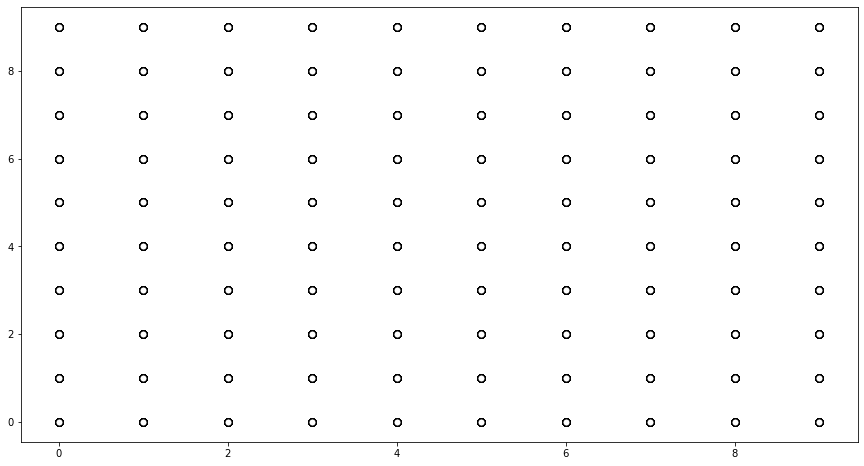

In [68]:
import matplotlib.pyplot as plt

# # create dataset
# X, y = make_blobs(
#    n_samples=150, n_features=2,
#    centers=3, cluster_std=0.5,
#    shuffle=True, random_state=0
# )

# plot
plt.scatter(
   df['P3B1'], df['P3B3'],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [60]:
from sklearn.cluster import KMeans
Z = df.Pick3,df.Date_Str
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=3000, 
    tol=3, random_state=1
)
y_km = km.fit_predict(Z)

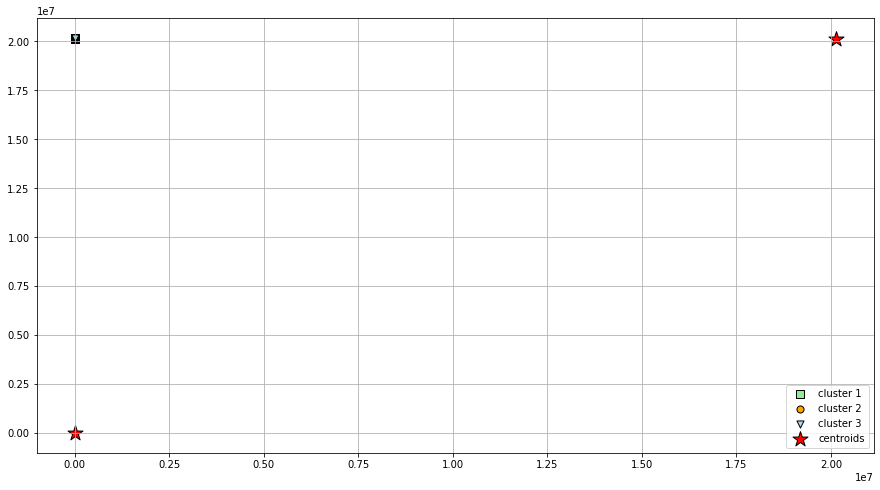

In [72]:
# plot the 3 clusters
plt.scatter(
    df.Pick3,df.Date_Str,
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    df.Pick4,df.Date_Str,
#     Z[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    df.Pick3,df.Date_Str,
#     Z[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()